In [ ]:
import numpy as np
import pandas as pd
import os


def generate_qubit_states(n_samples: int = 5000, seed: int = 42, include_bloch: bool = True) -> pd.DataFrame:
    """
    Generate a dataset of normalized qubit states:
        |ψ⟩ = α|0⟩ + β|1⟩, where |α|² + |β|² = 1

    Parameters:
        n_samples (int): Number of qubit states to generate.
        seed (int): Random seed for reproducibility.
        include_bloch (bool): Whether to include Bloch sphere coordinates.

    Returns:
        pd.DataFrame: Dataset with complex coefficients and optional Bloch coordinates.
    """
    np.random.seed(seed)
    records = []

    for _ in range(n_samples):
        alpha = np.random.randn() + 1j * np.random.randn()
        beta = np.random.randn() + 1j * np.random.randn()
        
        norm = np.sqrt(np.abs(alpha)**2 + np.abs(beta)**2)
        alpha /= norm
        beta /= norm

        record = {
            "alpha_real": alpha.real,
            "alpha_imag": alpha.imag,
            "beta_real": beta.real,
            "beta_imag": beta.imag,
            "norm_check": np.abs(alpha)**2 + np.abs(beta)**2,
        }

        if include_bloch:
            theta = 2 * np.arccos(np.abs(alpha))
            phi = (np.angle(beta) - np.angle(alpha)) % (2 * np.pi)

            bloch_x = np.sin(theta) * np.cos(phi)
            bloch_y = np.sin(theta) * np.sin(phi)
            bloch_z = np.cos(theta)

            record.update({
                "theta": theta,
                "phi": phi,
                "bloch_x": bloch_x,
                "bloch_y": bloch_y,
                "bloch_z": bloch_z,
            })

        records.append(record)

    return pd.DataFrame(records)


if __name__ == "__main__":
    df = generate_qubit_states(n_samples=5000, seed=2025)
    output_path = "../data/raw/qubit_states_dataset.csv"

    os.makedirs(os.path.dirname(output_path), exist_ok=True)
    df.to_csv(output_path, index=False)
    print(f"✅ Qubit state dataset saved to: {output_path}")


✅ Qubit state dataset saved to: ../data/raw/qubit_states_dataset.csv


In [11]:
import numpy as np
import pandas as pd
import os


def generate_normalized_qubit_states(n_samples: int = 5000, seed: int = 2025) -> pd.DataFrame:
    """
    Generate a dataset of normalized qubit states of the form:
        |ψ⟩ = α|0⟩ + β|1⟩
    such that:
        |α|^2 + |β|^2 = 1

    Returns a DataFrame with complex amplitudes and Bloch sphere coordinates.
    """
    np.random.seed(seed)
    data = []

    for _ in range(n_samples):
   
        alpha = np.random.randn() + 1j * np.random.randn()
        beta = np.random.randn() + 1j * np.random.randn()

 
        norm = np.sqrt(np.abs(alpha)**2 + np.abs(beta)**2)
        alpha /= norm
        beta /= norm

    
        theta = 2 * np.arccos(np.abs(alpha))
        phi = np.angle(beta) - np.angle(alpha)

   
        x = np.sin(theta) * np.cos(phi)
        y = np.sin(theta) * np.sin(phi)
        z = np.cos(theta)

        data.append({
            "alpha_real": alpha.real,
            "alpha_imag": alpha.imag,
            "beta_real": beta.real,
            "beta_imag": beta.imag,
            "|α|²": np.abs(alpha)**2,
            "|β|²": np.abs(beta)**2,
            "norm_check": np.abs(alpha)**2 + np.abs(beta)**2,
            "theta": theta,
            "phi": phi,
            "bloch_x": x,
            "bloch_y": y,
            "bloch_z": z
        })

    return pd.DataFrame(data)


if __name__ == "__main__":
    output_path = "../data/raw/qubit_dataset.csv"
    os.makedirs(os.path.dirname(output_path), exist_ok=True)

    df = generate_normalized_qubit_states()
    df.to_csv(output_path, index=False)

    print(f"✅ Normalized qubit dataset saved to: {output_path}")


✅ Normalized qubit dataset saved to: ../data/raw/qubit_dataset.csv


In [12]:
import numpy as np
import pandas as pd
import os


def generate_pure_state() -> np.ndarray:
    """
    Generate a single normalized qubit pure state vector |ψ⟩ = α|0⟩ + β|1⟩
    """
    alpha = np.random.randn() + 1j * np.random.randn()
    beta = np.random.randn() + 1j * np.random.randn()
    norm = np.sqrt(np.abs(alpha)**2 + np.abs(beta)**2)
    return np.array([alpha, beta]) / norm


def compute_density_matrix(states: list[np.ndarray], probs: list[float]) -> np.ndarray:
    """
    Compute the density matrix: ρ = Σ p_i |ψ_i⟩⟨ψ_i|
    """
    rho = np.zeros((2, 2), dtype=complex)
    for psi, p in zip(states, probs):
        outer_product = np.outer(psi, np.conjugate(psi))
        rho += p * outer_product
    return rho


def generate_density_matrices(n_samples: int = 5000, n_components: int = 3, seed: int = 2025) -> pd.DataFrame:
    """
    Generate a dataset of 2x2 density matrices.
    Each matrix is a mixture of `n_components` pure states.
    """
    np.random.seed(seed)
    data = []

    for _ in range(n_samples):
        # Generate n_components pure states
        states = [generate_pure_state() for _ in range(n_components)]
        probs = np.random.dirichlet(np.ones(n_components))  # ensures ∑p_i = 1

        # Compute the density matrix
        rho = compute_density_matrix(states, probs)

        # Flatten real and imaginary parts for dataset
        data.append({
            "rho_00_real": rho[0, 0].real,
            "rho_00_imag": rho[0, 0].imag,
            "rho_01_real": rho[0, 1].real,
            "rho_01_imag": rho[0, 1].imag,
            "rho_10_real": rho[1, 0].real,
            "rho_10_imag": rho[1, 0].imag,
            "rho_11_real": rho[1, 1].real,
            "rho_11_imag": rho[1, 1].imag,
            "trace": np.trace(rho).real,
            "purity": np.real(np.trace(rho @ rho))  # Tr(ρ²)
        })

    return pd.DataFrame(data)


if __name__ == "__main__":
    output_path = "../data/raw/density_matrices.csv"
    os.makedirs(os.path.dirname(output_path), exist_ok=True)

    df = generate_density_matrices()
    df.to_csv(output_path, index=False)

    print(f"✅ Density matrix dataset saved to: {output_path}")


✅ Density matrix dataset saved to: ../data/raw/density_matrices.csv


In [13]:
import numpy as np
import pandas as pd

def generate_born_rule_dataset(n_samples: int = 5000, seed: int = 42) -> pd.DataFrame:
    """
    Generate dataset showing measurement probabilities using the Born Rule.

    Formula: P(i) = ⟨ψ| Mi† Mi |ψ⟩

    Parameters:
        n_samples (int): Number of samples to generate.
        seed (int): Random seed for reproducibility.

    Returns:
        pd.DataFrame: Dataset with ψ, Mi, and P(i)
    """
    np.random.seed(seed)
    records = []

    for _ in range(n_samples):
       
        alpha = np.random.randn() + 1j * np.random.randn()
        beta = np.random.randn() + 1j * np.random.randn()
        norm = np.sqrt(np.abs(alpha)**2 + np.abs(beta)**2)
        alpha /= norm
        beta /= norm
        psi = np.array([[alpha], [beta]])

        Mi = np.random.randn(2, 2) + 1j * np.random.randn(2, 2)

        Mi_dagger_Mi = Mi.conj().T @ Mi
        prob = np.vdot(psi, Mi_dagger_Mi @ psi).real  # real part only

        records.append({
            "alpha_real": alpha.real,
            "alpha_imag": alpha.imag,
            "beta_real": beta.real,
            "beta_imag": beta.imag,
            "probability": prob
        })

    return pd.DataFrame(records)


if __name__ == "__main__":
    df = generate_born_rule_dataset()
    df.to_csv("../data/raw/born_rule_dataset.csv", index=False)
    print("✅ Born Rule dataset saved to: ../data/raw/born_rule_dataset.csv")


✅ Born Rule dataset saved to: ../data/raw/born_rule_dataset.csv


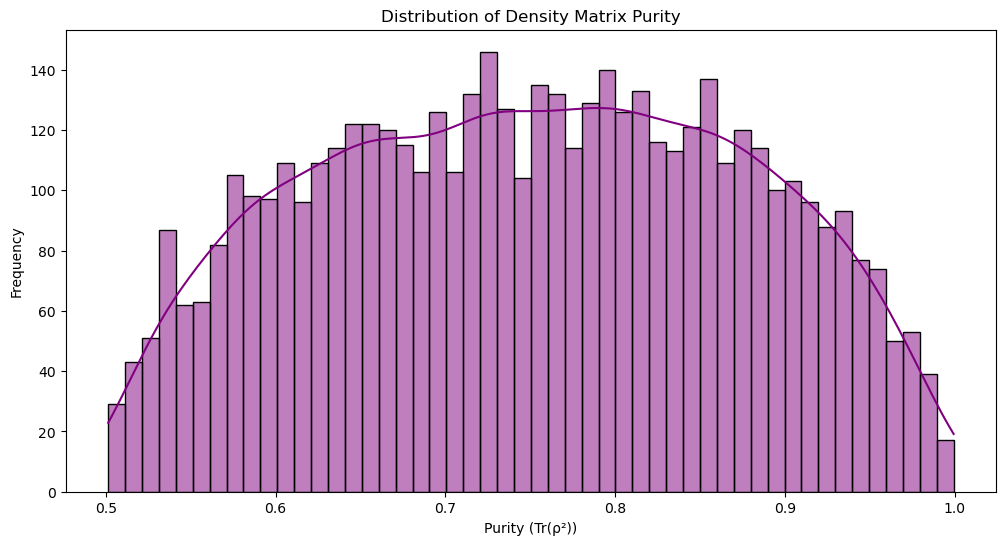

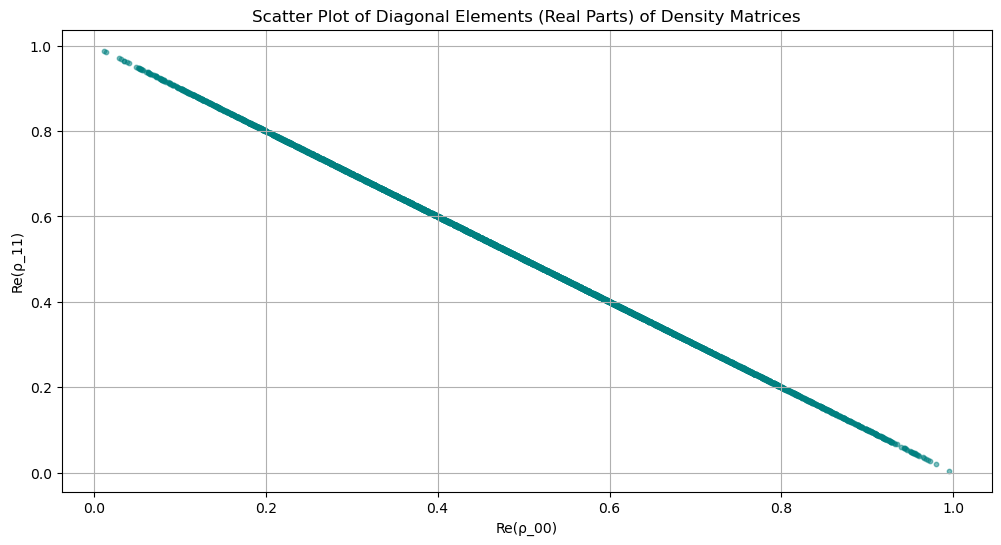

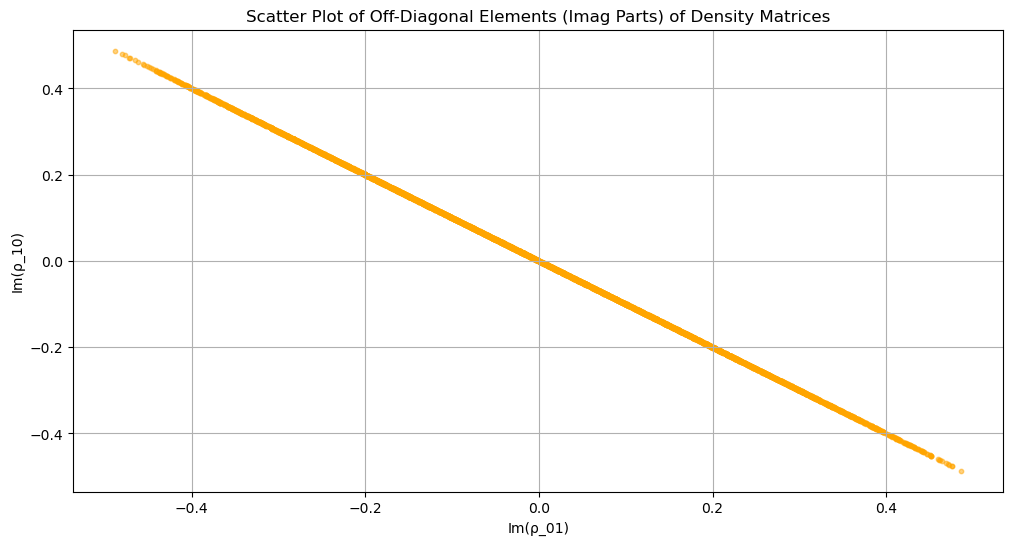

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv("../data/raw/density_matrices.csv")

plt.figure(figsize=(12,6))
sns.histplot(df['purity'], bins=50, kde=True, color='purple')
plt.title('Distribution of Density Matrix Purity')
plt.xlabel('Purity (Tr(ρ²))')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12,6))
plt.scatter(df['rho_00_real'], df['rho_11_real'], alpha=0.5, s=10, color='teal')
plt.title('Scatter Plot of Diagonal Elements (Real Parts) of Density Matrices')
plt.xlabel('Re(ρ_00)')
plt.ylabel('Re(ρ_11)')
plt.grid(True)
plt.show()

plt.figure(figsize=(12,6))
plt.scatter(df['rho_01_imag'], df['rho_10_imag'], alpha=0.5, s=10, color='orange')
plt.title('Scatter Plot of Off-Diagonal Elements (Imag Parts) of Density Matrices')
plt.xlabel('Im(ρ_01)')
plt.ylabel('Im(ρ_10)')
plt.grid(True)
plt.show()


In [14]:
import numpy as np
import pandas as pd

def generate_expectation_dataset(n_samples: int = 5000, seed: int = 42) -> pd.DataFrame:
    """
    Generate dataset for expectation value of observable:
        ⟨O⟩ = ⟨ψ| O |ψ⟩

    Args:
        n_samples (int): Number of data points to generate.
        seed (int): Random seed for reproducibility.

    Returns:
        pd.DataFrame: Dataset of qubit state and expectation value.
    """
    np.random.seed(seed)
    records = []

    for _ in range(n_samples):
        # Generate a random normalized qubit state |ψ⟩ = α|0⟩ + β|1⟩
        alpha = np.random.randn() + 1j * np.random.randn()
        beta = np.random.randn() + 1j * np.random.randn()
        norm = np.sqrt(np.abs(alpha)**2 + np.abs(beta)**2)
        alpha /= norm
        beta /= norm
        psi = np.array([[alpha], [beta]])

        # Create a random 2x2 Hermitian observable Ô
        a = np.random.randn()
        b = np.random.randn()
        c = np.random.randn()
        d = np.random.randn()
        observable = np.array([
            [a, b + 1j*c],
            [b - 1j*c, d]
        ])  # Hermitian by construction

        # Calculate expectation value: ⟨O⟩ = ⟨ψ| O |ψ⟩
        psi_dagger = psi.conj().T
        expectation = (psi_dagger @ observable @ psi).item().real  # Take real part

        records.append({
            "alpha_real": alpha.real,
            "alpha_imag": alpha.imag,
            "beta_real": beta.real,
            "beta_imag": beta.imag,
            "obs_00": a,
            "obs_01_real": b,
            "obs_01_imag": c,
            "obs_11": d,
            "expectation_value": expectation
        })

    return pd.DataFrame(records)

if __name__ == "__main__":
    df = generate_expectation_dataset()
    df.to_csv("../data/raw/expectation_value_dataset.csv", index=False)
    print("✅ Expectation Value dataset saved to: ../data/raw/expectation_value_dataset.csv")


✅ Expectation Value dataset saved to: ../data/raw/expectation_value_dataset.csv


In [9]:
import numpy as np
import pandas as pd
import os
from typing import List

def simulate_feature_map(x: List[float]) -> np.ndarray:
    """
    Simulate a quantum feature map using trigonometric functions.

    Args:
        x (List[float]): Input features.

    Returns:
        np.ndarray: Simulated 'statevector' with real and imaginary parts.
    """
    # Example feature map using trigonometric encoding
    reals = np.cos(x)
    imags = np.sin(x)
    
    # Simulate complex statevector (normalize to unit length)
    statevector = reals + 1j * imags
    statevector /= np.linalg.norm(statevector)
    
    return statevector

def generate_simulated_dataset(n_samples: int = 3000, n_features: int = 3, seed: int = 42) -> pd.DataFrame:
    np.random.seed(seed)
    records = []

    for _ in range(n_samples):
        x = np.random.uniform(-np.pi, np.pi, size=n_features)
        statevector = simulate_feature_map(x)

        record = {
            **{f"x{i+1}": val for i, val in enumerate(x)},
            **{f"amp_{i}_real": amp.real for i, amp in enumerate(statevector)},
            **{f"amp_{i}_imag": amp.imag for i, amp in enumerate(statevector)}
        }
        records.append(record)

    return pd.DataFrame(records)

if __name__ == "__main__":
    OUTPUT_PATH = "../data/raw/simulated_feature_map_dataset.csv"
    os.makedirs(os.path.dirname(OUTPUT_PATH), exist_ok=True)

    df = generate_simulated_dataset(n_samples=3000, n_features=3)
    df.to_csv(OUTPUT_PATH, index=False)

    print(f"✅ Simulated feature map dataset saved to: {OUTPUT_PATH}")


✅ Simulated feature map dataset saved to: ../data/raw/simulated_feature_map_dataset.csv


In [1]:
import numpy as np
import pandas as pd
import os

def simulate_feature_map(x):
    """Simulate a quantum feature map φ(x) using normalized sin/cos embedding."""
    re = np.cos(x)
    im = np.sin(x)
    phi = re + 1j * im
    return phi / np.linalg.norm(phi)

def quantum_kernel(x, x_prime):
    """Compute K(x, x') = |⟨φ(x)|φ(x')⟩|²"""
    phi_x = simulate_feature_map(x)
    phi_xp = simulate_feature_map(x_prime)
    return np.abs(np.vdot(phi_x, phi_xp))**2

def generate_data(n=5000, n_features=3, seed=42):
    np.random.seed(seed)
    data = []
    
    for _ in range(n):
        x = np.random.rand(n_features) * 2 * np.pi
        x_prime = np.random.rand(n_features) * 2 * np.pi
        k_val = quantum_kernel(x, x_prime)
        data.append(np.concatenate([x, x_prime, [k_val]]))

    columns = [f'x{i+1}' for i in range(n_features)] + \
              [f"x{i+1}'" for i in range(n_features)] + ['K(x,x\')']
    return pd.DataFrame(data, columns=columns)

# Create and save the dataset
os.makedirs("data/raw", exist_ok=True)
df = generate_data(n=5000, n_features=3)
csv_path = "../data/raw/quantum_kernel_data.csv"
df.to_csv(csv_path, index=False)

print(f"✅ Quantum kernel data saved to: {csv_path}")


✅ Quantum kernel data saved to: ../data/raw/quantum_kernel_data.csv


In [ ]:
import numpy as np
import pandas as pd
import os

def random_qubit_state():
    """Generate a random normalized single-qubit state |ψ⟩ = a|0⟩ + b|1⟩"""
    a = np.random.rand() + 1j * np.random.rand()
    b = np.random.rand() + 1j * np.random.rand()
    norm = np.sqrt(np.abs(a)**2 + np.abs(b)**2)
    return a / norm, b / norm

def apply_hadamard(a, b):
    """Apply Hadamard gate to |ψ⟩ = [a, b]"""
    h = 1 / np.sqrt(2) * np.array([[1, 1], [1, -1]])
    input_vec = np.array([a, b])
    return h @ input_vec

def generate_hadamard_data(n=5000, seed=42):
    np.random.seed(seed)
    rows = []

    for _ in range(n):
        a, b = random_qubit_state()
        h_out = apply_hadamard(a, b)
        p0 = np.abs(h_out[0])**2
        p1 = np.abs(h_out[1])**2

        rows.append([
            a.real, a.imag, b.real, b.imag,
            h_out[0].real, h_out[0].imag,
            h_out[1].real, h_out[1].imag,
            p0, p1
        ])
    
    columns = ['Re(a)', 'Im(a)', 'Re(b)', 'Im(b)',
               'Re(Hψ₀)', 'Im(Hψ₀)', 'Re(Hψ₁)', 'Im(Hψ₁)',
               'P0', 'P1']
    
    return pd.DataFrame(rows, columns=columns)

os.makedirs("data/raw", exist_ok=True)
df = generate_hadamard_data()
path = "../data/raw/hadamard_data.csv"
df.to_csv(path, index=False)

print(f"✅ Hadamard data saved to: {path}")


✅ Hadamard data saved to: ../data/raw/hadamard_data.csv


In [3]:
import numpy as np
import pandas as pd
import os

def random_qubit_state():
    """Generate a random normalized single-qubit state"""
    a = np.random.rand() + 1j * np.random.rand()
    b = np.random.rand() + 1j * np.random.rand()
    norm = np.sqrt(np.abs(a)**2 + np.abs(b)**2)
    return a / norm, b / norm

def ry_matrix(theta):
    """Generate the Ry(θ) gate"""
    c = np.cos(theta / 2)
    s = np.sin(theta / 2)
    return np.array([[c, -s],
                     [s,  c]])

def apply_ry(a, b, theta):
    """Apply Ry(θ) gate to the qubit [a, b]"""
    ry = ry_matrix(theta)
    state = np.array([a, b])
    return ry @ state

def generate_ry_data(n=5000, seed=42):
    np.random.seed(seed)
    rows = []

    for _ in range(n):
        a, b = random_qubit_state()
        theta = np.random.uniform(0, 2 * np.pi)
        ry_out = apply_ry(a, b, theta)
        p0 = np.abs(ry_out[0])**2
        p1 = np.abs(ry_out[1])**2

        rows.append([
            a.real, a.imag, b.real, b.imag,
            theta,
            ry_out[0].real, ry_out[0].imag,
            ry_out[1].real, ry_out[1].imag,
            p0, p1
        ])

    columns = ['Re(a)', 'Im(a)', 'Re(b)', 'Im(b)', 'θ',
               'Re(Ryψ₀)', 'Im(Ryψ₀)', 'Re(Ryψ₁)', 'Im(Ryψ₁)', 'P0', 'P1']

    return pd.DataFrame(rows, columns=columns)

# Save to CSV
os.makedirs("data/raw", exist_ok=True)
df = generate_ry_data()
path = "../data/raw/ry_rotation_data.csv"
df.to_csv(path, index=False)

print(f"✅ Ry(θ) data saved to: {path}")


✅ Ry(θ) data saved to: ../data/raw/ry_rotation_data.csv


In [4]:
import numpy as np
import pandas as pd
import os

def generate_pauli_z_expectation_dataset(n_samples: int = 5000, seed: int = 42) -> pd.DataFrame:
    """
    Generate a dataset of Pauli-Z expectation values using Ry(θ) rotations.

    Args:
        n_samples (int): Number of samples to generate.
        seed (int): Random seed for reproducibility.

    Returns:
        pd.DataFrame: DataFrame with θ and ⟨Z⟩ values.
    """
    np.random.seed(seed)
    thetas = np.random.uniform(0, 2 * np.pi, n_samples)
    z_expectations = np.cos(thetas)

    df = pd.DataFrame({
        "theta": thetas,
        "z_expectation": z_expectations
    })

    return df

if __name__ == "__main__":
    OUTPUT_PATH = "../data/raw/pauli_z_expectation_dataset.csv"
    os.makedirs(os.path.dirname(OUTPUT_PATH), exist_ok=True)

    df = generate_pauli_z_expectation_dataset()
    df.to_csv(OUTPUT_PATH, index=False)

    print(f"✅ Dataset saved to {OUTPUT_PATH}")


✅ Dataset saved to ../data/raw/pauli_z_expectation_dataset.csv


In [5]:
import numpy as np
import pandas as pd
import os

def softmax(z: np.ndarray) -> np.ndarray:
    """Compute softmax values for each set of scores in z."""
    e_z = np.exp(z - np.max(z))  # for numerical stability
    return e_z / e_z.sum(axis=0)

def generate_softmax_dataset(n_samples: int = 5000, vector_size: int = 5, seed: int = 42) -> pd.DataFrame:
    """
    Generate dataset using softmax transformation.

    Args:
        n_samples (int): Number of samples (rows).
        vector_size (int): Length of the input vector z.
        seed (int): Random seed.

    Returns:
        pd.DataFrame: DataFrame with input z and softmax(σ(z)).
    """
    np.random.seed(seed)
    raw_data = []
    
    for _ in range(n_samples):
        z = np.random.randn(vector_size)
        sigma = softmax(z)
        row = list(z) + list(sigma)
        raw_data.append(row)

    columns = [f"z{i+1}" for i in range(vector_size)] + [f"sigma{i+1}" for i in range(vector_size)]
    df = pd.DataFrame(raw_data, columns=columns)
    
    return df

if __name__ == "__main__":
    OUTPUT_PATH = "../data/raw/softmax_dataset.csv"
    os.makedirs(os.path.dirname(OUTPUT_PATH), exist_ok=True)

    df = generate_softmax_dataset()
    df.to_csv(OUTPUT_PATH, index=False)

    print(f"✅ Softmax dataset saved to {OUTPUT_PATH}")


✅ Softmax dataset saved to ../data/raw/softmax_dataset.csv


In [6]:
import numpy as np
import pandas as pd
import os

def softmax(z: np.ndarray) -> np.ndarray:
    """Compute softmax values for input array z."""
    exp_z = np.exp(z - np.max(z))  # stability trick
    return exp_z / exp_z.sum()

def cross_entropy_loss(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    """Compute the cross-entropy loss."""
    return -np.sum(y_true * np.log(y_pred + 1e-15))  # add epsilon for numerical stability

def generate_cross_entropy_dataset(n_samples: int = 5000, n_classes: int = 5, seed: int = 42) -> pd.DataFrame:
    np.random.seed(seed)
    dataset = []

    for _ in range(n_samples):
        z = np.random.randn(n_classes)
        y_pred = softmax(z)
        
        y_true = np.zeros(n_classes)
        true_class = np.random.randint(0, n_classes)
        y_true[true_class] = 1

        loss = cross_entropy_loss(y_true, y_pred)

        row = list(y_true) + list(y_pred) + [loss]
        dataset.append(row)

    columns = [f"y_true_{i+1}" for i in range(n_classes)] + \
              [f"y_pred_{i+1}" for i in range(n_classes)] + \
              ["loss"]

    df = pd.DataFrame(dataset, columns=columns)
    return df

if __name__ == "__main__":
    OUTPUT_PATH = "../data/raw/cross_entropy_dataset.csv"
    os.makedirs(os.path.dirname(OUTPUT_PATH), exist_ok=True)

    df = generate_cross_entropy_dataset()
    df.to_csv(OUTPUT_PATH, index=False)

    print(f"✅ Cross-Entropy Loss dataset saved to {OUTPUT_PATH}")


✅ Cross-Entropy Loss dataset saved to ../data/raw/cross_entropy_dataset.csv


In [7]:
import numpy as np
import pandas as pd
import os

def quadratic_gradient(theta: np.ndarray) -> np.ndarray:
    """
    Compute gradient of a quadratic cost function J(theta) = 0.5 * theta^T * theta
    Gradient: ∇J(theta) = theta
    """
    return theta

def generate_gradient_descent_dataset(
    n_samples: int = 5000,
    n_params: int = 5,
    learning_rate: float = 0.01,
    seed: int = 42
) -> pd.DataFrame:
    np.random.seed(seed)
    records = []

    for _ in range(n_samples):
        theta = np.random.randn(n_params)
        grad = quadratic_gradient(theta)
        theta_new = theta - learning_rate * grad

        record = {}
        # Store initial theta
        for i in range(n_params):
            record[f"theta_{i+1}"] = theta[i]
        # Store gradient
        for i in range(n_params):
            record[f"grad_{i+1}"] = grad[i]
        record["learning_rate"] = learning_rate
        # Store updated theta
        for i in range(n_params):
            record[f"theta_new_{i+1}"] = theta_new[i]

        records.append(record)

    return pd.DataFrame(records)

if __name__ == "__main__":
    OUTPUT_PATH = "../data/raw/gradient_descent_dataset.csv"
    os.makedirs(os.path.dirname(OUTPUT_PATH), exist_ok=True)

    df = generate_gradient_descent_dataset()
    df.to_csv(OUTPUT_PATH, index=False)
    print(f"✅ Gradient Descent dataset saved to {OUTPUT_PATH}")


✅ Gradient Descent dataset saved to ../data/raw/gradient_descent_dataset.csv
